Задание 1
Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов 
данных библиотеки sklearn.
Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
Масштабируйте данные с помощью StandardScaler.
Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.
Постройте диаграмму рассеяния на этих данных.


In [1]:
import pandas as pd

In [2]:
import numpy as np

In [32]:
import matplotlib.pyplot as plt

In [30]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [5]:
from sklearn.datasets import load_boston

In [6]:
boston = load_boston()

In [7]:
data = boston['data']

In [8]:
from sklearn.model_selection import train_test_split

In [13]:
feature_names = boston['feature_names']

In [15]:
X = pd.DataFrame(data, columns = feature_names)

In [18]:
target = boston['target']

In [19]:
Y = pd.DataFrame(target, columns = ['price'])

In [20]:
Y

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state=42)

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
scaler = StandardScaler()

In [24]:
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)

In [25]:
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)

In [26]:
from sklearn.manifold import TSNE

In [27]:
tsne = TSNE(n_components= 2, learning_rate= 250, random_state= 42)

In [28]:
X_train_tsne = tsne.fit_transform(X_test_scaled)

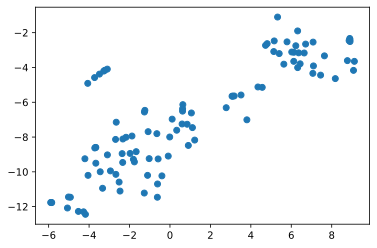

In [34]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.show()

Задание 2
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.
Вычислите средние значения price и CRIM в разных кластерах.


In [35]:
from sklearn.cluster import KMeans

In [36]:
model = KMeans(n_clusters=3, random_state=42, max_iter=100)

In [37]:
labels_train = model.fit_predict(X_test_scaled)

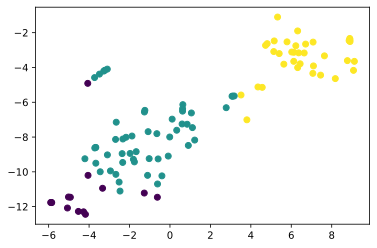

In [38]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c = labels_train)
plt.show()

In [ ]:
print('1 кластер: ', Y_train[labels_train == 0].mean())
print('2 кластер:', Y_train[labels_train == 1].mean())
print('3 кластер:', Y_train[labels_train == 2].mean())
print('1 кластер: ', X_train['CRIM'][labels_train == 0].mean())
print('2 кластер:', X_train['CRIM'][labels_train == 1].mean())
print('3 кластер:', X_train['CRIM'][labels_train == 2].mean())